<a href="https://colab.research.google.com/github/LinaGomez-lab/Prediction_Model_Catboost/blob/main/WiDS_Challenge2_Metastatic_Breast_Cancer_Period_Prediction__Modeling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WiDS 2024-Challenge 2: Breast Cancer Metastatic Diagnosis Period Prediction**


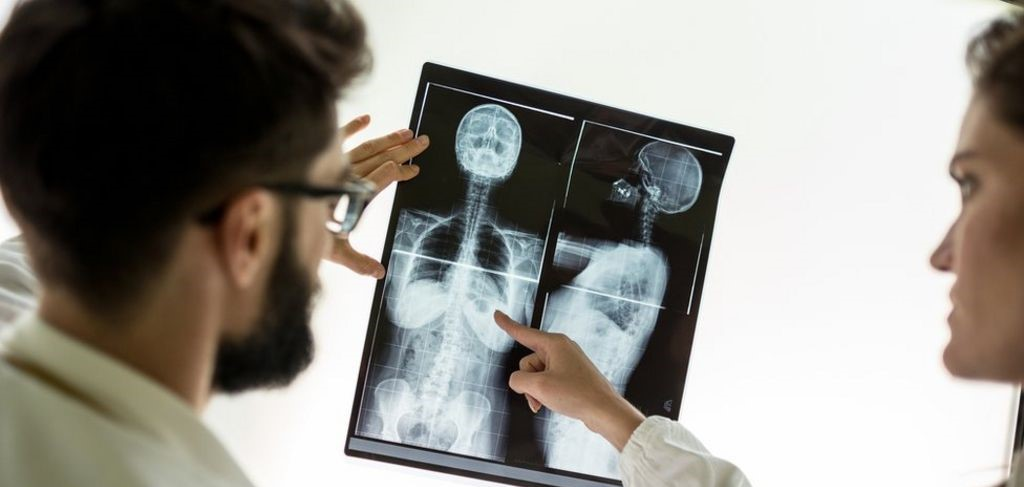

## **Lina Gomez *- Data Scientist & Data Analyst:***    ✉   **[ 🇱 LinkedIn Profile:](https://www.linkedin.com/in/lina-m-gomez-ds/)**


---


*This project is the result of a collaborative effort with **'Enise Zengin'** as team member in WiDS 2024 - Challenge 2*

## **I. Project Description**

### **Context:**

This project is part of the Women in Data Science (WiDS) Datathon 2024 (Challenge 2), focusing on a healthcare issue crucial for advancing equity for women globally. The datathon aims to identify potential disparities in treatment and investigate the underlying factors contributing to these biases, including demographic and societal elements. Addressing healthcare inequity is a global challenge with a significant impact on women’s health, which is vital for the well-being of societies and economies.

### **Objective:**
This project proposes a predictive model to estimate the time to metastatic cancer diagnosis in breast cancer patients, identifying key features that influence this timeline.

### **Business Goal:**
"Develop a predictive model proposal for the breast cancer metastatic diagnosis period that is accurate, identifies the main features relevant for healthcare decision-making, and is easy to update over time".

### **Data Description**

The Oncology Dataset was provided by WiDS and Gilead Sciences. It includes information on 18.819 patients, sourced from Health Verity, and is supplemented with third-party geo-demographic data to provide insights into socio-economic factors that may affect health equity. For this challenge, the dataset was further enhanced with zip code-level climate data, comprising a total of 152 variables.

### **Data Dictionary**

* Main variables (16): patient_id, patient_race, payer_type, patient_state, patient_zip3, Region, Division, patient_gender, bmi, breast_cancer_diagnosis_code, breast_cancer_diagnosis_desc, metastatic_cancer_diagnosis_code, metastatic_first_novel_treatment, metastatic_first_novel_treatment_type, metastatic_diagnosis_period.
* Sociodemographic variables(64): Includes average participation by ZIP code (3-digit) segmented by age group, marital status, income levels, education levels, employment status, race, and other factors.
* Monthly temperatures by ZIP code (72): Average temperatures by ZIP code (3-digit) from January 2013 to December 2018.

For a more detailed data description, follow this link. [Datathon WiDS 2024-Challenge 2](https://www.kaggle.com/competitions/widsdatathon2024-challenge2/data)

### **Data Model Strategy:**

The accuracy of the final proposed model relies on the processes of data cleaning, feature engineering, and model training. Its relevance was determined by leveraging business-related information in healthcare, specifically concerning breast cancer.   

* **Feature pre-selection:**

  - **Literature** recognizes age, race, BMI, and environmental factors like climate change as risk factors for breast cancer. Additional factors, such as payer type and patient state—related to state-level regulatory, legislative, or environmental variables—were considered as main features in the preselection process.

  - **During model training**, Optuna was used to select from other sociodemographic factors related to income, education levels, and barriers to healthcare access, based on accuracy metrics.

* **Data Cleaning:**

  - **Outlier correction (noisy data):** *BMI* contains outlier values that affect its significance in the models. Given the real issue of extreme obesity, these outliers were addressed by replacing them with the variable’s upper bound values. Other data errors on patient state were corrected.

  - **Missing values:** A major challenge in this database is the high proportion of missing data in key variables such as *BMI, patient_race, and payer_type*. To address this, missing values were imputed using the mean for numerical variables and the mode for categorical variables. The imputation was performed sequentially by *patient_zip3, patient_state, and Division*, respectively. The same sequential imputation process was applied to address missing values for other variables.
  The variables metastatic_first_novel_treatment_type and metastatic_first_novel_treatment were dropped because they contained data for only 13 out of 13,173 observations.

  - **Variety (handling text data):** Variables requiring special treatment include 'breast_cancer_diagnosis_code', which needs to be addressed with different versions of the International Classification of Diseases (ICD9 vs. ICD10), and 'breast_cancer_diagnosis_desc', which involves handling text data for variable descriptions.  


 * **Feature Engineering:**
  - **New features:** *Climate Change* was calculated through a two-step process: Step 1: Calculate the standard deviation of temperatures for each month from 2013 to 2018; and Step 2: Compute the mean of these monthly temperature standard deviations by ZIP code (3-digit). In Step 1, if there were no climate change, we would expect the monthly standard deviations to be zero. In Step 2, the mean is calculated by ZIP code, capturing variations in climate change impact across different areas. The variable **"Climate Change"** has a mean value of 3.1°F, indicating that average temperatures have increased by 3.1°F. The minimum value is 1.3°F, and the maximum value is 4.6°F.

  - **Dimensionality reduction:** PCA and t-SNE were applied for dimensionality reduction on sociodemographic variables; however, this approach did not improve the model's performance.

  - **Data Heterogeneity:** Robust Scaling and different Ordinal Encoding techniques were applied.

* **Model Training:**

  - **Models:** Models trained include 'CatBoost', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'Random Forest', 'XGBRFRegressor', 'Extra Trees Regressor', 'AdaBoost Regression', 'KNeighbors Regressor', 'Ridge', and 'SVR'. To reduce overfitting, 'Stacking' and 'Voting' ensemble techniques were applied. Feature importance analysis was conducted for the top three models.

  - **Imbalanced data:** A crucial challenge for model performance in this project was managing imbalanced data. The target variable, 'metastatic_diagnosis_period' (in days), is highly concentrated with zero values and exhibits right skewness. Additionally, the distribution of 'breast_cancer_diagnosis_code' influences the distribution of other key feature variables in the dataset, particularly for ICD-9 versus ICD-10 versions. This challenge was addressed in the **cross-validation** process with a **customized StratifiedKFold per group**, where the group was created using the 'breast_cancer_diagnosis_code' information.

  - **Hyperparameters and optimization:** In different stages, GridSearchCV or **Optuna** were used for fine-tuning and optimization processes.



## **II: Business Report 📰:**
An executive report summarizing the main results can be found at the following link:

### [Business Report](https://infograph.venngage.com/pl/5lQsdECOi68)

## **III. Summary of Results and Analysis 📈**:

* **What Worked:**

  - Corrected outlier values for BMI using upper bound limits.
  - Handled missing values through a sequential imputation technique that considers information from different levels based on location.
  - Created the 'Climate Change' feature using the average deviation in temperatures by month over the years to address the impact of this environmental factor. This variable is available at the 3-digit zip code level.
  - Applied a customized cross-validation technique, combining StratifiedKFold with group information from a 'breast_cancer_diagnosis_code' variable.
  - Used Optuna for optimization when necessary.

* **What Didn't Work:**

  - Use multivariable or KNN imputation strategies for key features.
  - Experimenting with different scaling techniques such as StandardScaler or MinMaxScaler. RobustScaler demonstrated better performance due to its handling of outlier values.
  - Testing various encoding techniques like LabelEncoder, OrdinalEncoder, OneHotEncoder, HashingEncoder, and BinaryEncoder for complex categorical variables. CatBoost Regressor performed exceptionally well by effectively managing categorical variable information within the model.
  - Attempting to apply NLP techniques for the variable 'breast_cancer_diagnosis_desc' did not yield the desired improvements in model performance. CatBoost was effective enough for handling this variable without additional NLP processing.
  - Applying PCA or t-SNE for dimensionality reduction on sociodemographic variables.
  - Other definitions for Climate Change.

* **Takeways:**

  - One key takeaway from this project is the power of the CatBoost model in handling a database with many and diverse categorical features.

## **Conclusion**

The best model performance was achieved using 14 features to explain the metastatic diagnosis period, employing a CatBoost model with cross-validation conducted through a customized StratifiedKFold per group. These groups were based on 'breast_cancer_diagnosis_code' information. Applying this cross-validation technique effectively handled the distribution characteristics of both the target variable and the input variables.

The accuracy of the final proposed model relies on thorough data cleaning, feature engineering, and model training. Its relevance was underscored by leveraging business-related healthcare information, specifically in the context of breast cancer.

The main features account for 95.9% of the predictive power, with the following distribution:
  - Medical Diagnosis Information (76.2%): include breast cancer diagnosis code (42.8%), breast cancer diagnosis description (26.8%), and metastatic cancer diagnosis code (6.8%).
  - Patient Information (10.4%): include Age, Race, BMI     
  - Legal, Local (Regional), or Environmental (9.3%): includes payer type, patient state, patient zip3, and climate change by zip3.

Other factors included were Commute Time, Education (Highest and Lowest Levels), and Household Income ($35k-$50k). Together, they account for 4.1% of the predictive power.

We recognize how powerful the CatBoost model was for handling a project with many and diverse categorical variables.

  #### **Related skills: Managing complex datasets and Prediction**


## **IV. Project Development:**

### **1) Import libraries**

In [85]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import OrdinalEncoder

'''
from sklearn.preprocessing import  RobustScaler, Normalizer, MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer
from sklearn.impute import SimpleImputer

!pip install category_encoders
import category_encoders as ce
from category_encoders import HashingEncoder, BinaryEncoder
'''
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GroupKFold, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, f1_score, accuracy_score, mean_squared_error

'''
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor, GradientBoostingRegressor,  ExtraTreesRegressor
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import Ridge, RidgeCV, LinearRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# xgboost imports
from xgboost import XGBRegressor, XGBRFRegressor
import xgboost as xgb

# lightgbm import
from lightgbm import LGBMRegressor
'''
# catboost import
!pip3 install catboost
from catboost import CatBoostRegressor
from catboost import EShapCalcType, EFeaturesSelectionAlgorithm

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.inspection import permutation_importance
from datetime import datetime

!pip install skimpy
from skimpy import skim

!pip install optuna
import optuna

# Set theme for seaborn
sns.set_theme(style='white')
plt.style.use('ggplot')

# Define RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', 200)

# Set seed for reproducibility
seed = 42


### **2) Load database**

* Google Drive

In [86]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# Replace 'your_file.csv' with the path to your file in Google Drive
test_path ='/content/drive/MyDrive/Colab Notebooks/Competitions/WiDS Challenge2/Metastatics/test.csv'
train_path ='/content/drive/MyDrive/Colab Notebooks/Competitions/WiDS Challenge2/Metastatics/train.csv'
submission_path ='/content/drive/MyDrive/Colab Notebooks/Competitions/WiDS Challenge2/Metastatics/subm.csv'

# Load the datasets
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

### **3) Exploratory Data Analysis (EDA)**

### **3.1) General Overview**

In [88]:
print('Train', train.shape)
print('Test', test.shape)

Train (13173, 152)
Test (5646, 151)


In [89]:
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13173  │ │ float64     │ 137   │                                                          │
│ │ Number of columns │ 152    │ │ string      │ 11    │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ patient_id         │    0 │     0 │ 555400 │ 259500 │ 100000 │ 335100 │ 555800 │ 781000 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ patient_zip3       │    0 │     0 │  568.5 │  275.8 │    100 │    330 │    557 │    832 │     995 │ ▆▅▆▅▅▇ │  │
│ │ patient_age        │    0 │     0 │  59.27 │  13.22 │     18 │     50 │     59 │     67 │      91 │  ▂▆▇▃▂ │  │
│ │ bmi                │ 9071 │ 68.86 │  29.17 │  5.753 │     15 │  24.82 │  28.58 │     33 │      97 │   ▇▇   │  │
│ │ population         │    0 │     0 │  20650 │  13840 │  635.5 │   9160 │  18950 │  30020 │   71370 │ ▇▇▅▂▁  │  │
│ │ density            │    0 │     0 │   1777 │   3876 │   0.92 │  163.2 │  700.3 │   1667 │   29850 │   ▇    │  │
│ │ age_median         │    0 │     0 │  40.54 │  4.031 │   20.6 │  37.19 │  40.64 │  42.94 │   54.57 │   ▅▇▃▁ │  │
│ │ age_under_10       │    0 │     0 │   11.1 │  1.512 │      0 │  10.15 │     11 │  12.14 │   17.68 │   ▁▇▃  │  │
│ │ age_10_to_19       │    0 │     0 │  12.86 │  1.952 │   6.31 │  11.65 │   12.9 │  13.91 │    35.3 │   ▂▇   │  │
│ │ age_20s            │    0 │     0 │   13.3 │   3.39 │   5.93 │     11 │  12.53 │  14.97 │    62.1 │   ▇▂   │  │
│ │ age_30s            │    0 │     0 │  12.89 │  2.411 │    1.5 │  11.27 │   12.4 │  14.13 │   25.47 │   ▇▃▁  │  │
│ │ age_40s            │    0 │     0 │  12.06 │  1.249 │    0.8 │  11.35 │  12.12 │  12.86 │   17.82 │    ▇▇  │  │
│ │ age_50s            │    0 │     0 │  13.46 │  1.672 │      0 │   12.3 │  13.57 │  14.61 │   21.66 │   ▁▇▃  │  │
│ │ age_60s            │    0 │     0 │  12.63 │  2.571 │    0.2 │  10.62 │  12.52 │  13.99 │   24.51 │   ▇▇▁  │  │
│ │ age_70s            │    0 │     0 │   7.67 │  2.139 │      0 │   6.01 │   7.33 │   8.84 │      19 │   ▅▇▂  │  │
│ │ age_over_80        │    0 │     0 │  4.021 │  1.258 │      0 │   3.32 │   3.82 │   4.56 │   18.83 │   ▂▇   │  │
│ │ male               │    0 │     0 │  50.09 │  1.695 │  39.73 │  49.15 │  49.98 │  50.95 │    61.6 │    ▇▃  │  │
│ │ female             │    0 │     0 │  49.91 │  1.695 │   38.4 │  49.05 │  50.02 │  50.85 │   60.28 │    ▃▇  │  │
│ │ married            │    0 │     0 │  47.65 │  7.529 │    0.9 │  42.93 │  49.43 │  52.99 │    66.9 │   ▁▃▇▂ │  │
│ │ divorced           │    0 │     0 │  12.69 │  2.056 │    0.2 │  11.16 │  12.72 │  14.19 │   21.03 │   ▃▇▃  │  │
│ │ never_married      │    0 │     0 │  33.82 │  8.127 │  13.44 │  27.27 │  32.01 │  39.29 │    98.9 │  ▃▇▂   │  │
│ │ widowed            │    0 │     0 │  5.846 │  1.556 

* It’s important to impute individual missing values for the variables: patient_race, payer_type, and BMI. A strategy needs to be established for each of them as main features in this problem.

In [90]:
test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,5646.0,NaN,NaN,NaN,549581.84768,260549.557126,100401.0,325189.75,551142.5,773004.0,999846.0
patient_race,2861,5,White,1564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_type,4861,3,COMMERCIAL,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_state,5646,44,CA,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_zip3,5646.0,NaN,NaN,NaN,569.824655,276.824893,100.0,330.0,554.0,836.0,997.0
Region,5646,4,South,1785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Division,5646,8,East North Central,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_age,5646.0,NaN,NaN,NaN,58.921537,13.326813,18.0,50.0,59.0,66.0,91.0
patient_gender,5646,1,F,5646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1705.0,NaN,NaN,NaN,29.142798,5.612167,16.0,24.84,28.34,33.14,43.7


### **3.2) Variable Analysis**

#### **i) Target Distribution**

In [91]:
target= 'metastatic_diagnosis_period'

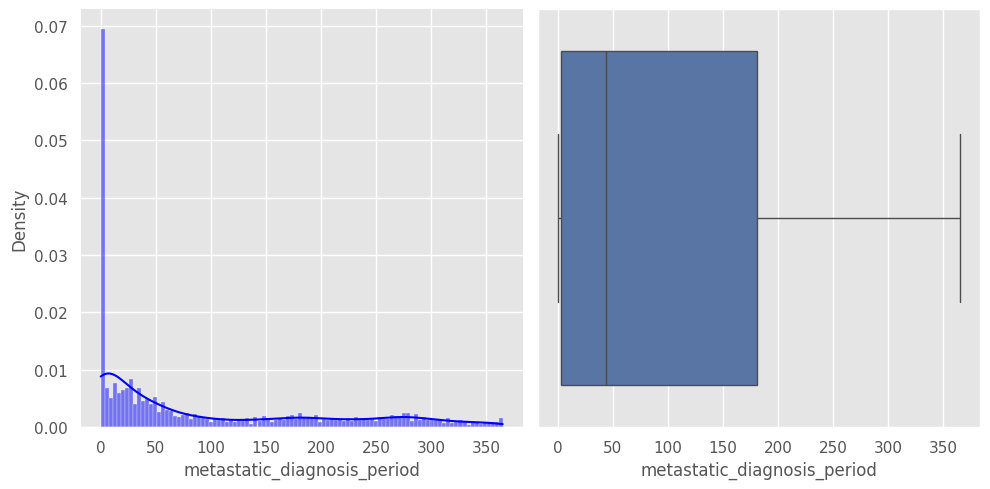

In [92]:
#Histogram - Target variable
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train, x=target, bins=100, stat='density', kde=True, color='blue',)
sns.despine(left=True, bottom=False)

# Boxplot plot
plt.subplot(1, 2, 2)
sns.boxplot(data=train, x=target, color='b')  # Set boxplot color to green
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

* Right-skewed variable. It takes values from 0 to 365 days and represents the number of days after the breast cancer was diagnosed.

#### **ii) Target Variable - Cross Tabulation**

Boxplot for'metastatic_diagnosis_period': 



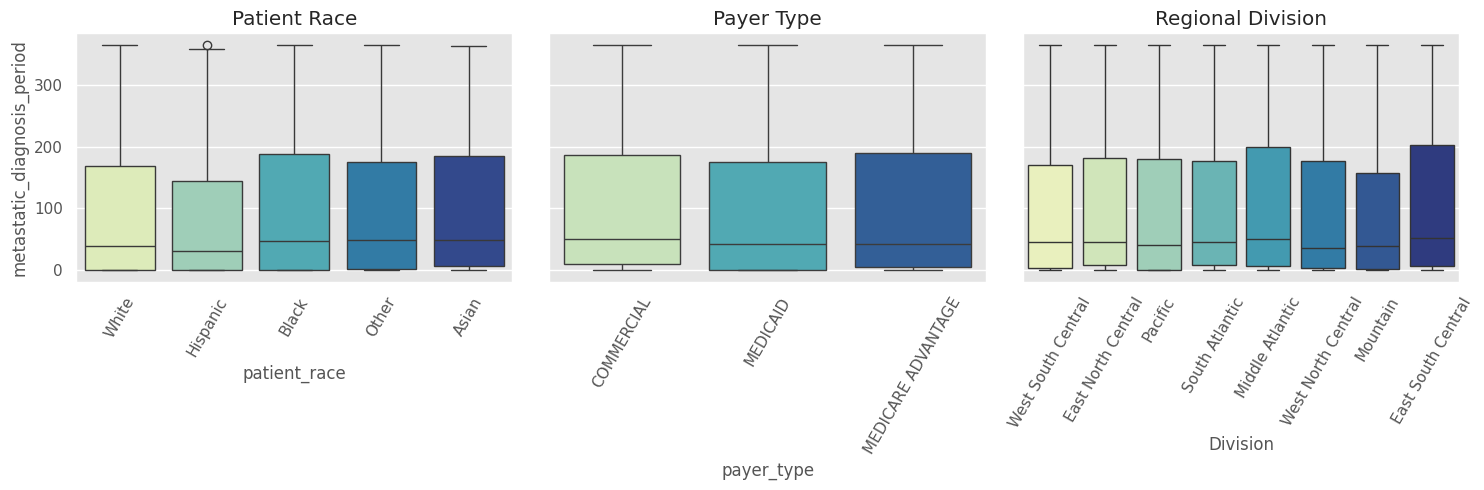

Boxplot for'bmi': 



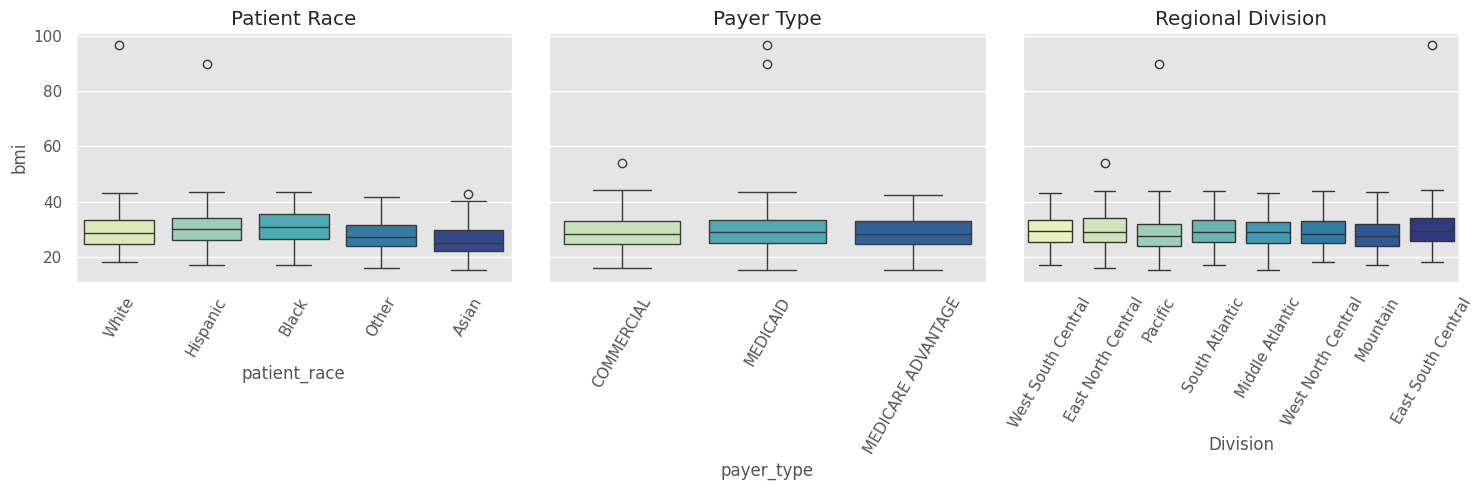

Boxplot for'patient_age': 



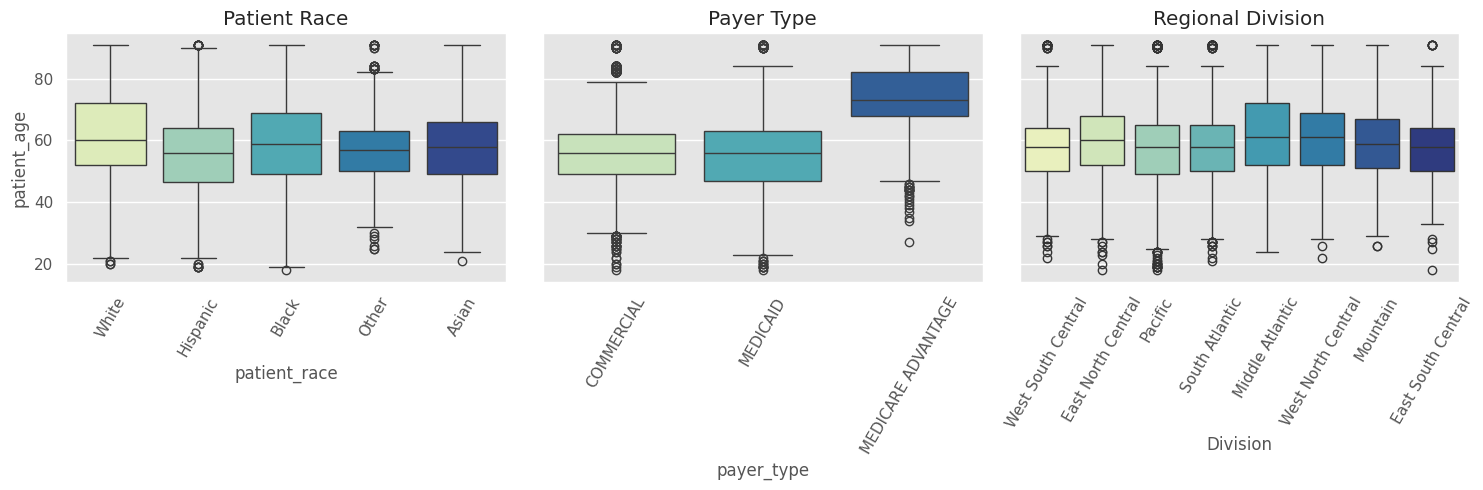

In [55]:
data = train

#Other covariables analysis
variables = ['metastatic_diagnosis_period', 'bmi', 'patient_age']

for var in variables:
    # Create a figure and subplots
    print(f"Boxplot for'{var}': \n"   )
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

    # Plot the first boxplot
    sns.boxplot(ax=axs[0], data=data, x="patient_race", y=var, palette='YlGnBu')
    axs[0].set_title('Patient Race')
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=60)

    # Plot the second boxplot
    sns.boxplot(ax=axs[1], data=data, x="payer_type", y=var, palette='YlGnBu')
    axs[1].set_title('Payer Type')
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=60)

    # Plot the second boxplot
    sns.boxplot(ax=axs[2], data=data, x="Division", y=var, palette='YlGnBu')
    axs[2].set_title('Regional Division')
    axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=60)

    #palette='BuGn', 'YlGnBu', 'Blues', 'Greens'
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()



* There are three outliers in the BMI data that require correction.

#### **iii) Other Numerical Variables Distribution Analysis**

patient_zip3
Skew: -0.11


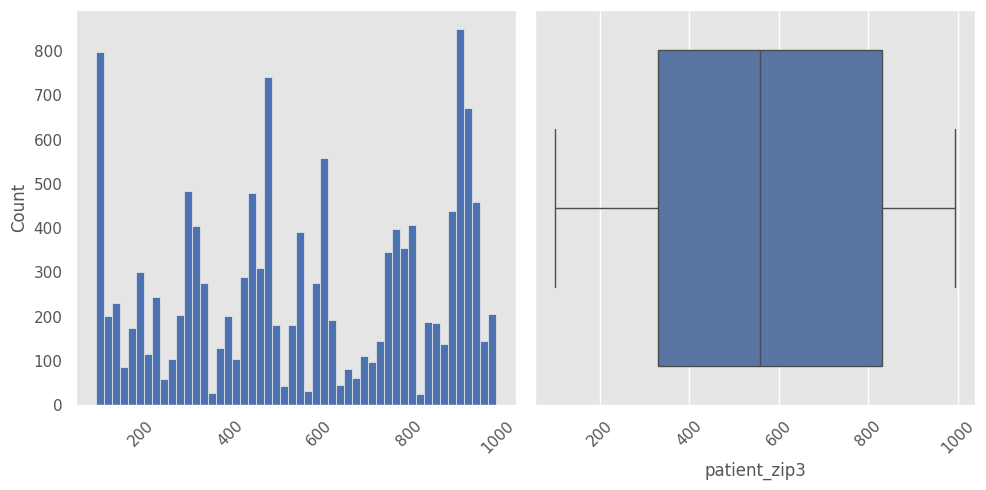

patient_age
Skew: 0.16


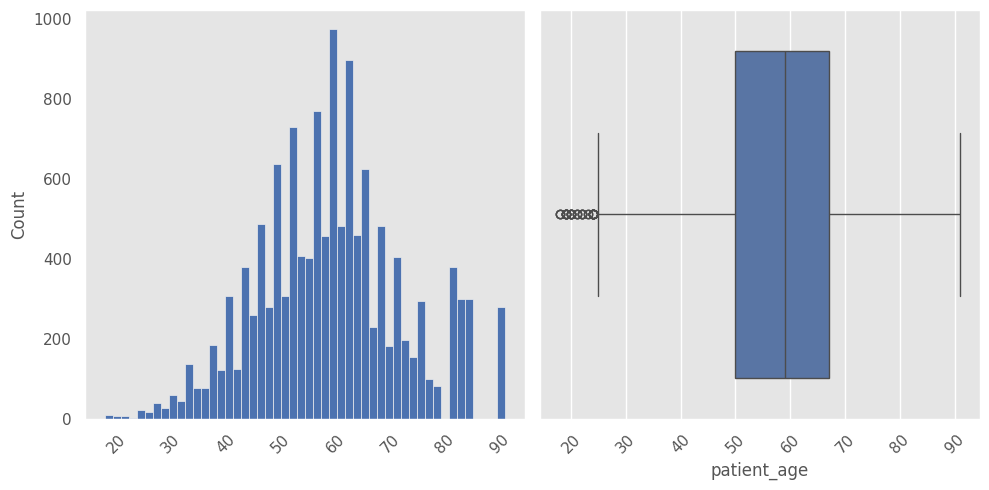

bmi
Skew: 0.99


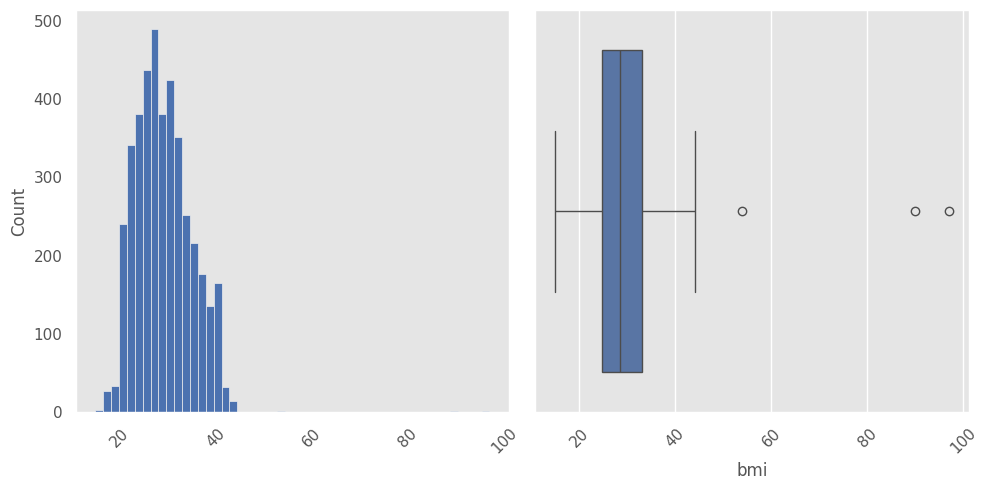

In [56]:
#Train
data=train

num = data.select_dtypes(include=['number']).drop(columns=data.loc[:, 'population':'Average of Dec-18']).columns.to_list()
rem = ['patient_id', target]

# Remove each element in 'rem' from 'num'
for item in rem:
    if item in num:
        num.remove(item)

# if you wanted to exclude "target" var:
#num = num[~num.isin([target])]

for col in num:
    print(col)
    print('Skew:', round(data[col].skew(), 2))   # Print skewness rounded to two digits
    plt.figure(figsize=(10, 5))

    # Histogram plot
    plt.subplot(1, 2, 1)
    data[col].hist(bins=50, grid=False, color='b')  # Set histogram color to green
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Boxplot plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='b')  # Set boxplot color to green
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

#### **iv) Categorical data**

In [57]:
def descriptive(db, colname):
    from tabulate import tabulate

    print(f"Value counts for column '{colname}':")
    value_counts = db[colname].value_counts(dropna=False).head(200)
    total_count = len(db[colname])
    data = []
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        data.append([value, count, f"{percentage:.2f}%"])
    headers = ["Value", "Count", "Percentage"]
    print(tabulate(data, headers=headers, tablefmt="fancy_outline"))
    print('=' * 50)

In [58]:
descriptive(train, 'breast_cancer_diagnosis_code')
descriptive(train, 'breast_cancer_diagnosis_desc')


Value counts for column 'breast_cancer_diagnosis_code':
╒═════════╤═════════╤══════════════╕
│ Value   │   Count │ Percentage   │
╞═════════╪═════════╪══════════════╡
│ 1749    │    1947 │ 14.78%       │
│ C50912  │    1834 │ 13.92%       │
│ C50911  │    1803 │ 13.69%       │
│ C50919  │    1504 │ 11.42%       │
│ C50411  │     927 │ 7.04%        │
│ C50412  │     907 │ 6.89%        │
│ C50812  │     524 │ 3.98%        │
│ C50811  │     479 │ 3.64%        │
│ 1744    │     402 │ 3.05%        │
│ 1748    │     337 │ 2.56%        │
│ C50212  │     292 │ 2.22%        │
│ C50211  │     249 │ 1.89%        │
│ C50512  │     225 │ 1.71%        │
│ C50511  │     220 │ 1.67%        │
│ C50112  │     207 │ 1.57%        │
│ C50111  │     197 │ 1.50%        │
│ C50311  │     160 │ 1.21%        │
│ C50312  │     139 │ 1.06%        │
│ 1742    │     110 │ 0.84%        │
│ C50012  │     104 │ 0.79%        │
│ C50011  │      90 │ 0.68%        │
│ 1741    │      86 │ 0.65%        │
│ 1745    │      81

* Different codes related to the start of 17 or 19 for ICD-9 and C50 for ICD-10.

### **4) Data Cleaning**

In [59]:
# Fixing mistakes
db = [train, test]

for data in db:
    # Fix bad zip
    data['patient_state'] = np.where(data['patient_zip3'] == 630, 'MO', np.where(data['patient_zip3'] == 864, 'AZ', data['patient_state']))

#### **i) Outlier Correction**

In [60]:
#Outliers at upper bound -  general process applied to smooth the distribution
def outlier_smooth(db, var):
    Q1 = db[var].quantile(0.25)
    Q3 = db[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_percentile = db[var].quantile(0.05)
    upper_percentile = db[var].quantile(0.95)

    db[var] = np.where(db[var] < lower_bound, lower_percentile, db[var])
    db[var] = np.where(db[var] > upper_bound, upper_percentile, db[var])

    print('Max value for {var} is:', db[var].max())
    print('Min value for {var} is:', db[var].min())

    plt.figure(figsize=(5, 5))
    sns.histplot(data=db, x=var, stat='count', kde=True, color='b')
    sns.despine(left=True, bottom=False)
    plt.show()

Max value for {var} is: 44.08
Min value for {var} is: 15.0


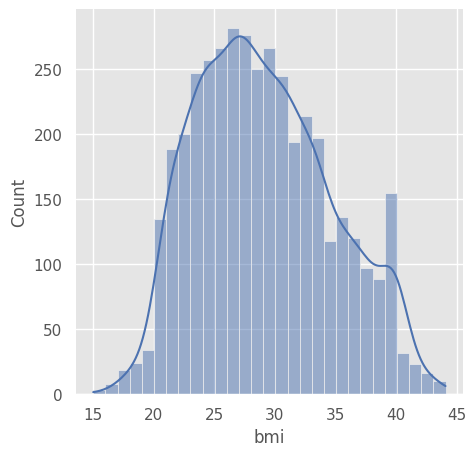

Max value for {var} is: 43.7
Min value for {var} is: 16.0


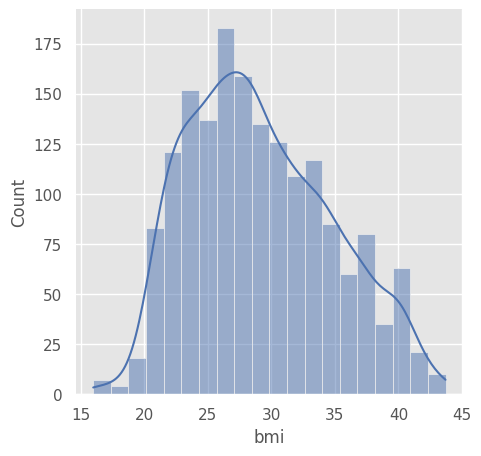

In [61]:
#Apply outlier_smooth to correct upper_bound outliers in BMI data
outlier_smooth(train, 'bmi')
outlier_smooth(test, 'bmi')

* Outliers replaced with upper bound values

#### **ii) Missing Values Correction**

In [62]:
# This allows us to check if despite having a high proportion of missing values, this variable appears as relevant after applying encoding, none as a category:   #It didn't work...

train['metastatic_first_novel_treatment'] = train['metastatic_first_novel_treatment'].fillna('None')
train['metastatic_first_novel_treatment_type'] = train['metastatic_first_novel_treatment_type'].fillna('None')

test['metastatic_first_novel_treatment'] = test['metastatic_first_novel_treatment'].fillna('None')
test['metastatic_first_novel_treatment_type'] = test['metastatic_first_novel_treatment_type'].fillna('None')

In [63]:
# Replace missing values
def mixed_imputation(df, group_col):
    """
    Impute missing values in a DataFrame using mean for numerical columns and mode for categorical columns, grouped by a specified column.
    Returns:
        DataFrame: DataFrame with missing values imputed.
    """
    for column in df.columns:
        if column != group_col:  # Exclude the group column
            # If the column is numerical, then mean imputation
            if df[column].dtype in [np.dtype('float_'), np.dtype('int_')]:
                mean_impute = df.groupby(group_col)[column].mean()
                df[column] = df[column].fillna(df[group_col].map(mean_impute))

            # If the column is categorical, apply mode imputation
            else :
                mode_impute = df.groupby(group_col)[column].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
                df[column] = df[column].fillna(df[group_col].map(mode_impute))

    return df

* To manage missing values, define the mean for numerical features and the mode for categorical features.

* **Main variables with high missing values: BMI, patient_race, payer_type**

In [64]:
#Sequential strategy which prioritizes mean or mode, by i) patient_zip3, ii) patient_state, iii) Division - according to availability
db = [train, test]

for data in db:

    main_var = ['patient_race', 'payer_type', 'bmi']

    for mvar_imp in main_var:
        data[mvar_imp] = mixed_imputation(
            mixed_imputation(
                mixed_imputation(data[['patient_zip3', 'patient_state', 'Division', mvar_imp]], group_col='patient_zip3'),
                group_col='patient_state'),
            group_col='Division')[mvar_imp].values


    other_pop = data.loc[:, 'population':'Average of Dec-18'].columns.to_list()

    for var_imp in other_pop:
        data[var_imp] = mixed_imputation(
            mixed_imputation(
                mixed_imputation(data[['patient_zip3', 'patient_state', 'Division', var_imp]], group_col='patient_zip3'),
                group_col='patient_state'),
            group_col='Division')[var_imp].values

 * Define a sequential imputation process by 'patient_zip3', 'patient_state', and 'Division'.

#### **iii) Other data cleaning procedures**

* **Depuration code for the variable: 'breast_cancer_diagnosis_code'**

In [65]:
db = [train, test]

for data in db:
# This version just adjust code '17' (icd version 9) into categories 'C50' (icd version 10) and fixed mistakes
    data['breast_cancer_diagnosis_code0'] = data['breast_cancer_diagnosis_code'].replace({
                           '1741':'C50119', 'C50122':'C50112',                                       #Central
                           '1742':'C50219', 'C50221':'C50211',                                       #Upper Inner
                           '1743':'C50319',                                                          #Lower Inner
                           '1744':'C50419', 'C50421':'C50411',                                       #Upper Outer
                           '1745':'C50519',                                                          #Lower Outer
         '19881':'C50719', '1748':'C50719',                                                          #Other and Secondary - create the code C50719
                           '1749':'C50919', 'C50922':'C50912', 'C509':'C50919',                      #Unspecified
                           '1746':'C50619',                                                          #Axillary tail
        })

# This version additionally joined general and unspecified for each category
    data['breast_cancer_diagnosis_code1'] = data['breast_cancer_diagnosis_code'].replace({
         'C5011':'C50119', '1741':'C50119', 'C50122':'C50112',                                       #Central
         'C5021':'C50219', '1742':'C50219', 'C50221':'C50211',                                       #Upper Inner
         'C5031':'C50319', '1743':'C50319',                                                          #Lower Inner
         'C5041':'C50419', '1744':'C50419', 'C50421':'C50411',                                       #Upper Outer
                           '1745':'C50519',                                                          #Lower Outer
         '19881':'C50719', '1748':'C50719',                                                          #Other and Secondary - create the code C50719
         'C5081':'C50819',                                                                           #Overlapping
         'C5091':'C50919', '1749':'C50919', 'C50922':'C50912', 'C509':'C50919',                      #Unspecified
                           '1746':'C50619', 'C50611':'C50619', 'C50612':'C50619',                    #Axillary tail
         'C5001':'C50019',                  'C50011':'C50019', 'C50012':'C50019',                    #Nipple and Areola
       })

#This version simplify without right and left differentiation -except for unspecified
    data['breast_cancer_diagnosis_code2'] = data['breast_cancer_diagnosis_code'].replace({
         'C5011':'C50119', '1741':'C50119', 'C50122':'C50112', 'C50111':'C50119', 'C50112':'C50119',                #Central
         'C5021':'C50219', '1742':'C50219', 'C50221':'C50211',                                                      #Upper Inner
         'C5031':'C50319', '1743':'C50319',                    'C50311':'C50319', 'C50312':'C50319',                #Lower Inner
         'C5041':'C50419', '1744':'C50419', 'C50421':'C50411', 'C50411':'C50419', 'C50412':'C50419',                #Upper Outer
                           '1745':'C50519',                    'C50511':'C50519', 'C50512':'C50519',                #Lower Outer
         '19881':'C50719', '1748':'C50719',                    'C50711':'C50719', 'C50712':'C50719',                #Other and Secondary - create the code C50719
         'C5081':'C50819',                                     'C50811':'C50819', 'C50812':'C50819',                #Overlapping
         'C5091':'C50919', '1749':'C50919', 'C50922':'C50912',                                     'C509':'C50919', #Unspecified
                           '1746':'C50619',                    'C50611':'C50619', 'C50612':'C50619',                  #Axillary tail
         'C5001':'C50019',                                     'C50011':'C50019', 'C50012':'C50019',                  #Nipple and Areola
       })

### **5) Feature Engineering**

#### **i) New Features**

* **Create variable climate change**

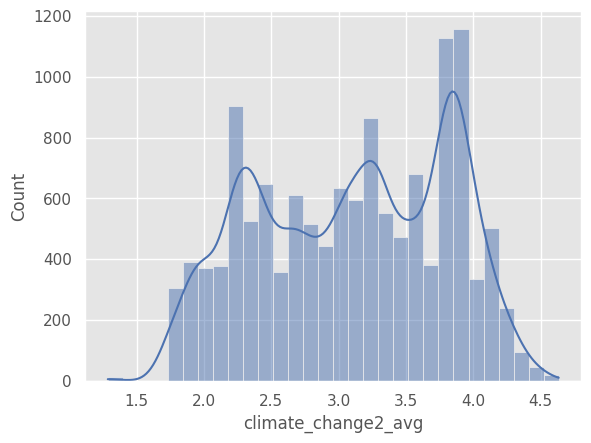

In [66]:
db = [train, test]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for data in db:
    for i in months:
        data[f"w_{i}_std"] = data[
            [f"Average of {i}-13", f"Average of {i}-14", f"Average of {i}-15", f"Average of {i}-16", f"Average of {i}-17", f"Average of {i}-18"]
        ].std(axis=1)

    # Calculate 'climate_change2_avg' once after the loop
    data['climate_change2_avg'] = data[
        [f"w_{month}_std" for month in months]
    ].mean(axis=1)

   # Plot the histogram once after calculations
sns.histplot(data=train, x='climate_change2_avg', stat='count', kde=True, color='b')
plt.show()
    #sns.histplot(data=data, x='climate_change2_avg', stat='count', kde=True)

* **Categorical definition for variables: BMI and Age**

In [67]:
db = [train, test]

for data in db:

    # Categorize variables
    data['age_group'] = pd.cut(data['patient_age'], right=False, bins=[0, 25, 45, 65, 85,  np.inf], labels=[0,1,2,3,4]).astype(int)

    # Include bmi info
    data['bmi_missing'] = data['bmi'].isna().astype(int)
    data['bmi_recoded'] = np.where(data['bmi'].isna(), 0,
                                      np.where(data['bmi'] < 18.5, 1,
                                              np.where(data['bmi'] < 25, 2,
                                                     np.where(data['bmi'] < 30, 3, 4))))


In [68]:
# Define dictionaries to map numerical labels to descriptive labels
age_group_labels = {
    0: '0-24',
    1: '25-44',
    2: '45-64',
    3: '65-84',
    4: '85+'
}

bmi_recoded_labels = {
    0: 'Missing',
    1: 'Underweight',
    2: 'Normal weight',
    3: 'Overweight',
    4: 'Obese'
}

train['age_group_l'] = train['age_group'].map(age_group_labels)
train['bmi_recoded_l'] = train['bmi_recoded'].map(bmi_recoded_labels)


descriptive(train, 'age_group_l')
descriptive(train, 'bmi_recoded_l')


Value counts for column 'age_group_l':
╒═════════╤═════════╤══════════════╕
│ Value   │   Count │ Percentage   │
╞═════════╪═════════╪══════════════╡
│ 45-64   │    7539 │ 57.23%       │
│ 65-84   │    3718 │ 28.22%       │
│ 25-44   │    1601 │ 12.15%       │
│ 85+     │     279 │ 2.12%        │
│ 0-24    │      36 │ 0.27%        │
╘═════════╧═════════╧══════════════╛
Value counts for column 'bmi_recoded_l':
╒═══════════════╤═════════╤══════════════╕
│ Value         │   Count │ Percentage   │
╞═══════════════╪═════════╪══════════════╡
│ Overweight    │    7062 │ 53.61%       │
│ Obese         │    4577 │ 34.75%       │
│ Normal weight │    1493 │ 11.33%       │
│ Underweight   │      41 │ 0.31%        │
╘═══════════════╧═════════╧══════════════╛


In [69]:
descriptive(train, 'patient_race')
descriptive(train, 'payer_type')

Value counts for column 'patient_race':
╒══════════╤═════════╤══════════════╕
│ Value    │   Count │ Percentage   │
╞══════════╪═════════╪══════════════╡
│ White    │    8058 │ 61.17%       │
│ Black    │    2234 │ 16.96%       │
│ Hispanic │    1428 │ 10.84%       │
│ Other    │     890 │ 6.76%        │
│ Asian    │     563 │ 4.27%        │
╘══════════╧═════════╧══════════════╛
Value counts for column 'payer_type':
╒════════════════════╤═════════╤══════════════╕
│ Value              │   Count │ Percentage   │
╞════════════════════╪═════════╪══════════════╡
│ COMMERCIAL         │    7584 │ 57.57%       │
│ MEDICAID           │    2941 │ 22.33%       │
│ MEDICARE ADVANTAGE │    2648 │ 20.10%       │
╘════════════════════╧═════════╧══════════════╛


* icd

In [70]:
train['icd'] = train['breast_cancer_diagnosis_code'].str.startswith(('17', '19')).astype(str)

test['icd'] = test['breast_cancer_diagnosis_code'].str.startswith(('17', '19')).astype(str)

In [71]:
descriptive(train, 'icd')

Value counts for column 'icd':
╒═════════╤═════════╤══════════════╕
│ Value   │   Count │ Percentage   │
╞═════════╪═════════╪══════════════╡
│ False   │   10144 │ 77.01%       │
│ True    │    3029 │ 22.99%       │
╘═════════╧═════════╧══════════════╛


In [72]:
# Create dummy variables for the 'icd' column
icd_d = pd.get_dummies(train['icd'], prefix='icd')

# Concatenate the original DataFrame with the dummy variables
train = pd.concat([train, icd_d], axis=1)

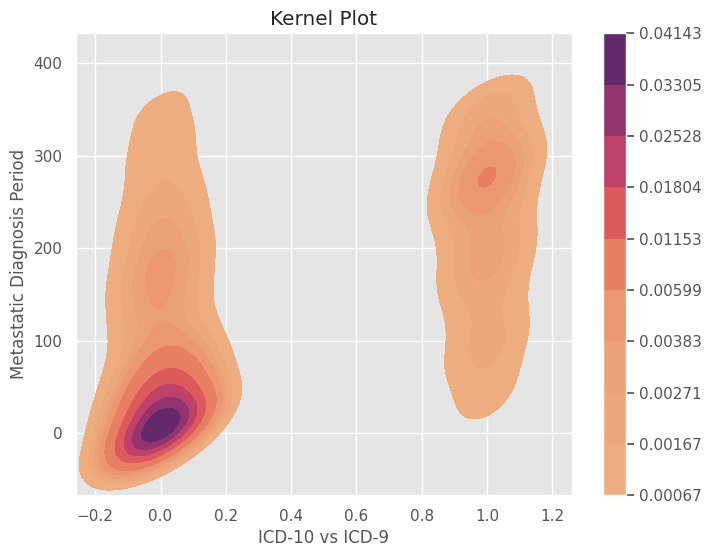

In [73]:
# Create a 2D KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x=train['icd_True'], y=train['metastatic_diagnosis_period'], cmap='flare', shade=True, cbar=True)
plt.xlabel('ICD-10 vs ICD-9')
plt.ylabel('Metastatic Diagnosis Period')
plt.title('Kernel Plot')
plt.show()

* The target variable has a different distribution for ICD-9 compared to ICD-10. It's necessary to incorporate this distributional characteristic into the training process.

In [74]:
main_features = ['bmi_recoded_l', 'age_group_l', 'patient_race', 'payer_type']

# Dictionary to store the pivot tables with dynamically generated names
mean_tables = {}

for var in main_features:
    # Create the pivot table and store it in the dictionary with a dynamic name
    mean_tables[f'mean_icd_{var}'] = train.pivot_table(values='metastatic_diagnosis_period',  # Replace 'target' with your actual target variable name
                                                       index=[var],
                                                       columns='icd',
                                                       aggfunc='mean')

    # Optionally, print the table name and the table itself
    print(f"Mean ICD Table for {var}:")
    print(mean_tables[f'mean_icd_{var}'])
    print("\n")

Mean ICD Table for bmi_recoded_l:
icd                False        True
bmi_recoded_l                       
Normal weight  60.378330  227.280654
Obese          59.543667  222.907060
Overweight     56.639732  226.252288
Underweight    66.535714  254.000000


Mean ICD Table for age_group_l:
icd              False        True
age_group_l                       
0-24          6.694444         NaN
25-44        68.659035  220.076720
45-64        59.786126  224.186123
65-84        51.060354  229.942515
85+          55.584229         NaN


Mean ICD Table for patient_race:
icd               False        True
patient_race                       
Asian         70.154867  217.180180
Black         63.896653  225.052731
Hispanic      53.125224  216.358065
Other         59.745588  220.814286
White         56.297044  227.777718


Mean ICD Table for payer_type:
icd                     False        True
payer_type                               
COMMERCIAL          59.429116  220.314774
MEDICAID           

* These differences in distribution are also related to the distribution of feature values.

#### **ii) Feature pre-selection**

In [75]:
# Remove columns with a high proportion of missing values
df_train = train.drop(['metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment', 'patient_gender'], axis=1)
df_test  = test.drop(['metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment',  'patient_gender'], axis=1)

* These variables were dropped from the database due to a lack of variability.

In [76]:
imp_features = ['breast_cancer_diagnosis_desc',
                'breast_cancer_diagnosis_code',
                'metastatic_cancer_diagnosis_code',
                'patient_age',
                'bmi',
                'payer_type',
                'patient_race',
                'climate_change2_avg',
                'education_highschool',
                'commute_time',
                'education_stem_degree',
                'income_household_35_to_50',
                'patient_zip3',
                'patient_state'
                ]

#Selected variables train data
X = df_train[imp_features]
y = df_train['metastatic_diagnosis_period']

print(X.shape, y.shape)

#Selected variables test data
Xs = df_test[imp_features]
print(Xs.shape)

(13173, 14) (13173,)
(5646, 14)


* These variables were selected through an iterative optimization process. The above list of variables is the final result of this process.

#### **iii) Scaling**

* **Robust Scaler**

In [78]:
# Get numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.to_list()

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data
scaler.fit(X[numerical_cols])

# Transform the training data
X[numerical_cols] = scaler.transform(X[numerical_cols])

# Transform the test data using the same scaler
Xs[numerical_cols] = scaler.transform(Xs[numerical_cols])

#### **iv) Encoding**

* **Ordinal Encoding**

In [79]:
####### FOR APPLYING ORDINAL ENCODING STRATEGY FOR ALL VARIABLES

# Identify categorical columns
categorical_cols = X.columns[X.dtypes == 'object'].to_list()

# Initialize OrdinalEncoder
encoded_Ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit the encoder on the training data
encoded_Ordinal.fit(X[categorical_cols])

# Transform the training data
X_enc_o = pd.concat([
    X[X.columns[~X.columns.isin(categorical_cols)]].reset_index(drop=True),
    pd.DataFrame(encoded_Ordinal.transform(X[categorical_cols]), columns=categorical_cols).reset_index(drop=True)
], axis=1)

# Transform the test data
Xs_enc_o = pd.concat([
    Xs[Xs.columns[~Xs.columns.isin(categorical_cols)]].reset_index(drop=True),
    pd.DataFrame(encoded_Ordinal.transform(Xs[categorical_cols]), columns=categorical_cols).reset_index(drop=True)
], axis=1)

In [80]:
skim(X_enc_o)
skim(Xs_enc_o)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 13173  │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 14     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA ┃ NA % ┃ mean     ┃ sd     ┃ p0      ┃ p25     ┃ p50 ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ patient_age           │  0 │    0 │  0.01596 │ 0.7776 │  -2.412 │ -0.5294 │   0 │ 0.4706 │  1.882 │  ▂▆▇▃▂ │  │
│ │ bmi                   │  0 │    0 │  0.01975 │  1.093 │  -4.048 │ -0.5107 │   0 │ 0.4893 │   4.37 │  ▂▇▆▁  │  │
│ │ climate_change2_avg   │  0 │    0 │ -0.03302 │ 0.5348 │  -1.407 │  -0.532 │   0 │  0.468 │  1.132 │ ▁▆▆▇▇▂ │  │
│ │ education_highschool  │  0 │    0 │   0.0174 │ 0.6772 │  -2.309 │ -0.4908 │   0 │ 0.5092 │  2.225 │  ▂▇▇▃  │  │
│ │ commute_time          │  0 │    0 │  0.03169 │ 0.8714 │  -2.625 │    -0.5 │   0 │    0.5 │  3.464 │  ▃▇▅ ▁ │  │
│ │ education_stem_degree │  0 │    0 │  0.05271 │ 0.7715 │  -3.223 │  -0.473 │   0 │  0.527 │  5.069 │   ▃▇▁  │  │
│ │ income_household_35_t │  0 │    0 │ -0.07179 │ 0.7598 │  -2.988 │ -0.5546 │   0 │ 0.4454 │  3.614 │   ▂▇▅  │  │
│ │ o_50                  │    │      │          │        │         │         │     │        │        │        │  │
│ │ patient_zip3          │  0 │    0 │  0.02297 │ 0.5493 │ -0.9104 │ -0.4522 │   0 │ 0.5478 │ 0.8725 │ ▆▅▆▅▅▇ │  │
│ │ breast_cancer_diagnos │  0 │    0 │    27.81 │  13.65 │       0 │      18 │  36 │     40 │     46 │ ▂▂▃▁▂▇ │  │
│ │ is_desc               │    │      │          │        │         │         │     │        │        │        │  │
│ │ breast_cancer_diagnos │  0 │    0 │    28.89 │  15.43 │       0 │      14 │  31 │     44 │     46 │ ▅▁▁▃▁▇ │  │
│ │ is_code               │    │      │          │        │         │         │     │        │        │        │  │
│ │ metastatic_cancer_dia │  0 │    0 │    11.91 │  13.09 │       0 │       3 │   3 │     25 │     42 │ ▇▂  ▂▁ │  │
│ │ gnosis_code           │    │      │          │        │         │         │     │        │        │        │  │
│ │ payer_type            │  0 │    0 │   0.6253 │ 0.7977 │       0 │       0 │   0 │      1 │      2 │ ▇  ▃ ▃ │  │
│ │ patient_race          │  0 │    0 │    3.036 │  1.335 │       0 │       2 │   4 │      4 │      4 │ ▁▂ ▁▁▇ │  │
│ │ patient_state         │  0 │    0 │    19.59 │  12.53 │       0 │       8 │  19 │     30 │     43 │ ▇▇▅▂▇▅ │  │
│ └───────────────────────┴────┴──────┴──────────┴────────┴─────────┴─────────┴─────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5646   │ │ float64     │ 14    │                                                          │
│ │ Number of columns │ 14     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA ┃ NA % ┃ mean      ┃ sd     ┃ p0      ┃ p25     ┃ p50       ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ patient_age    │  0 │    0 │ -0.004615 │ 0.7839 │  -2.412 │ -0.5294 │         0 │ 0.4118 │  1.882 │  ▂▆▇▃▂ │  │
│ │ bmi            │  0 │    0 │   0.04355 │  1.167 │  -3.759 │ -0.5479 │ -0.003555 │ 0.6342 │   4.26 │  ▂▇▅▁  │  │
│ │ climate_change │  0 │    0 │  -0.04532 │ 0.5353 │  -1.407 │  -0.532 │ -0.001171 │ 0.4577 │  1.132 │ ▁▆▆▇▇▂ │  │
│ │ 2_avg          │    │      │           │        │         │         │           │        │        │        │  │
│ │ education_high │  0 │    0 │   0.02377 │ 0.6772 │  -1.788 │ -0.4908 │         0 │ 0.5193 │  2.215 │ ▁▅▇▆▂  │  │
│ │ school         │    │      │           │        │         │         │           │        │        │        │  │
│ │ commute_time   │  0 │    0 │    0.0452 │ 0.8665 │  -3.235 │ -0.4893 │         0 │    0.5 │  3.464 │  ▂▇▆ ▁ │  │
│ │ education_stem │  0 │    0 │   0.03771 │ 0.7734 │  -2.676 │ -0.4831 │  -0.02027 │ 0.5152 │  4.579 │   ▅▇▁  │  │
│ │ _degree        │    │      │           │        │         │         │           │        │        │        │  │
│ │ income_househo │  0 │    0 │  -0.05378 │ 0.7633 │  -2.988 │ -0.5457 │    0.0118 │ 0.4572 │  3.614 │   ▂▇▅  │  │
│ │ ld_35_to_50    │    │      │           │        │         │         │           │        │        │        │  │
│ │ patient_zip3   │  0 │    0 │   0.02555 │ 0.5514 │ -0.9104 │ -0.4522 │ -0.005976 │ 0.5558 │ 0.8765 │ ▅▅▆▃▅▇ │  │
│ │ breast_cancer_ │  0 │    0 │     27.72 │  13.57 │      -1 │      18 │        36 │     40 │     46 │ ▁▃▃▁▂▇ │  │
│ │ diagnosis_desc │    │      │           │        │         │         │           │        │        │        │  │
│ │ breast_cancer_ │  0 │    0 │      28.5 │  15.59 │      -1 │      11 │        29 │     43 │     45 │ ▁▃▁▃▁▇ │  │
│ │ diagnosis_code │    │      │           │        │         │         │           │        │        │        │  │
│ │ metastatic_can │  0 │    0 │     11.94 │     13 │      -1 │       3 │         3 │     25 │     42 │ ▇▂▁▁▂▁ │  │
│ │ cer_diagnosis_ │    │      │           │        │         │         │           │        │        │        │  │
│ │ code           │    │      │           │        │         │         │           │        │        │        │  │
│ │ payer_type     │  0 │    0 │    0.6463 │ 0.7953 │       0 │       0 │         0 │      1 │      2 │ ▇  ▃ ▃ │  │
│ │ patient_race   │  0 │    0 │     3.037 │  1.309 │       0 │       2 │         4 │      4 │      4 │ ▁▂ ▂▁▇ │  │
│ │ patient_state  │  0 │    0 │     19.67 │  12.61 │       0 │       8 │        19 │     30 │     43 │ ▇▆▅▁▇▆ │  │
│ └────────────────┴────┴──────┴───────────┴────────┴───

### **6) Model Training**

#### **Model Trained: CatBoost with a Customized Cross-Validation Technique**

* **Set the Features Selection**

In [81]:
selected_features = ['breast_cancer_diagnosis_desc',
                     'patient_age',
                     'metastatic_cancer_diagnosis_code',
                     'bmi',
                     'payer_type',
                     'breast_cancer_diagnosis_code',
                     'patient_race',
                     'climate_change2_avg',
                     'education_highschool',
                     'commute_time',
                     'education_stem_degree',
                      'income_household_35_to_50',
                      'patient_zip3',
                      'patient_state'
                     ]

cb_features = X[selected_features]
categ_features = X[selected_features].columns[X[selected_features].dtypes == 'object'].to_list()


* **Cross_validation Technique: StratifiedKFold with Groups in 'breast_cancer_diagnosis_code'**

Fold_1 --- RMSE: 80.4071, R2: 0.4499
Fold_2 --- RMSE: 83.8556, R2: 0.4146
Fold_3 --- RMSE: 80.8734, R2: 0.4492
Fold_4 --- RMSE: 84.7528, R2: 0.3968
Fold_5 --- RMSE: 80.7018, R2: 0.4533
Fold_6 --- RMSE: 82.2764, R2: 0.4277
Fold_7 --- RMSE: 78.7213, R2: 0.4800
Fold_8 --- RMSE: 83.8193, R2: 0.4084
Fold_9 --- RMSE: 78.9021, R2: 0.4752
Fold_10 --- RMSE: 81.6568, R2: 0.4345
RMSE: 81.59666499487466
R2: 0.43895257956298817
Training time: 0:13:41.533859



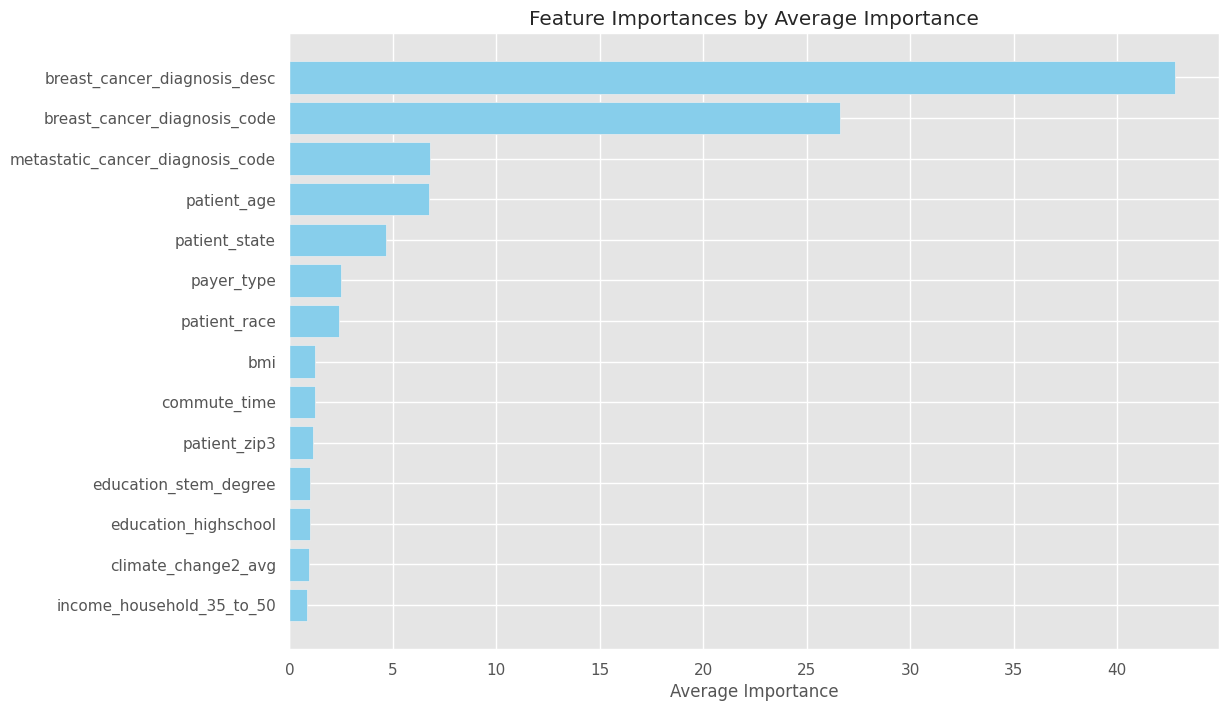

In [82]:

groups = np.array(X['breast_cancer_diagnosis_code'])


scores = []
final_prediction=[]

skf = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

# Ensure average_importances is initialized correctly
average_importances = np.zeros(len(selected_features))

# Define your seed for reproducibility
seed = 42  # Replace with your seed value

t1 = datetime.now()


for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # CatBoost Pool
    train_pool = Pool(X_train[selected_features], label=y_train, cat_features=categ_features)
    val_pool = Pool(X_val[selected_features], label=y_val, cat_features=categ_features)

    # Training the model
    model = CatBoostRegressor(
        custom_metric=['R2', 'RMSE'],
        ctr_target_border_count=10,
        random_seed=seed,
        verbose=False,
    )
    model.fit(train_pool, eval_set=val_pool, use_best_model=True, early_stopping_rounds=300)

    # Predictions
    test_preds = model.predict(Xs[selected_features])  # Ensure Xs is defined and matches selected_features
    final_prediction.append(test_preds)

    # Scores
    r2 = model.get_best_score()['validation']['R2']
    rmse = model.get_best_score()['validation']['RMSE']
    scores.append((rmse, r2))

    print(f"Fold_{fold} --- RMSE: {rmse:.4f}, R2: {r2:.4f}")

    # Collect feature importances
    importances = model.get_feature_importance(Pool(X_train[selected_features], label=y_train, cat_features=categ_features))
    average_importances += np.array(importances)

t2 = datetime.now()

# Average performance calculation
average_rmse = np.mean([score[0] for score in scores])
average_r2 = np.mean([score[1] for score in scores])

print(f'RMSE: {average_rmse}')
print(f'R2: {average_r2}')
print(f"Training time: {t2 - t1}\n")

# Normalize average feature importances
average_importances /= skf.get_n_splits()

# Create a DataFrame for sorting and plotting
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': average_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Average Importance")
plt.title("Feature Importances by Average Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()



* Final model include 14 features, with K=10

* **Feature Importance Table**

In [83]:
feature_importance_df

,Feature,Importance
0,breast_cancer_diagnosis_desc,42.791320
5,breast_cancer_diagnosis_code,26.626441
2,metastatic_cancer_diagnosis_code,6.773022
1,patient_age,6.746702
13,patient_state,4.674409
4,payer_type,2.518971
6,patient_race,2.418863
3,bmi,1.233640
9,commute_time,1.230417
12,patient_zip3,1.154136


* **Submission File**

In [84]:
# stack final prediction and get it's mean
prediction=np.mean(np.column_stack(final_prediction),axis=1)

submission['metastatic_diagnosis_period']= prediction

# submission file
submission.to_csv('subm_Catboost_StratKFold_k10_f14.csv', index=False)

### **7) Conclusions:**

The best model performance was achieved using 14 features to explain the metastatic diagnosis period, employing a CatBoost model with cross-validation conducted through a customized StratifiedKFold per group. These groups were based on 'breast_cancer_diagnosis_code' information. Applying this cross-validation technique effectively handled the distribution characteristics of both the target variable and the input variables.

The accuracy of the final proposed model relies on thorough data cleaning, feature engineering, and model training. Its relevance was underscored by leveraging business-related healthcare information, specifically in the context of breast cancer.

The main features account for 95.9% of the predictive power, with the following distribution:
- Medical Diagnosis Information (76.2%): include breast cancer diagnosis code (42.8%), breast cancer diagnosis description (26.8%), and metastatic cancer diagnosis code (6.8%).
- Patient Information (10.4%): include Age, Race, BMI
- Legal, Local (Regional), or Environmental (9.3%): includes payer type, patient state, patient zip3, and climate change by zip3.

Other factors included were Commute Time, Education (Highest and Lowest Levels), and Household Income (35k−50k). Together, they account for 4.1% of the predictive power.

One key takeaway from this project is the power of the CatBoost model in handling a database with many and diverse categorical features.

### **8) References and Acknowledgments:**

We extend our sincere thanks to everyone who participated in the discussion forums and shared valuable insights during the competition. The following resources were particularly helpful to us and inspired some of our applied approaches:

- Missing imputation strategy: Simona Gradinaru: https://www.kaggle.com/code/simonagradinaru/wids-24-2-embracing-diversity-robustness
- ICD as a cross product with other features: Sharon Sujitha & Chandan Kumar: https://www.kaggle.com/competitions/widsdatathon2024-challenge2/discussion/511624
- StratifiedKFold: Rebecca Achola & Ogwal Odyek: https://www.kaggle.com/code/ogwalakello/wids-datathon-2024-1st-place-solution?scriptVersionId=182110288